In [1]:
import pandas as pd 
import re
import numpy as np

In [2]:

df1=pd.read_csv("recipes.csv") 
df2=pd.read_csv("recipes1.csv") 
df3=pd.read_csv("recipes2.csv") 
df4=pd.read_csv("recipes3.csv")

In [3]:
#combines the data from two scrapped csvs (the webscrapping was done in two shifts) 
#drops dulicate rows where a recipe appeared in >1 search


print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
recipedf= pd.concat([df1,df2,df3,df4],ignore_index=True)
print(recipedf.shape)
recipedf=recipedf.drop('Unnamed: 0',axis=1)
recipedf=recipedf.drop_duplicates()
print(recipedf.shape)
type(recipedf)

(2007, 6)
(1198, 6)
(699, 6)
(276, 6)
(4180, 6)
(2838, 5)


pandas.core.frame.DataFrame

In [4]:
#gets rid of recipe titles that are irrelevant- must be a cake and be vanilla/white/yellow


recipedf=recipedf[recipedf["Recipe_title"].str.contains("Cake|cake")& recipedf["Recipe_title"].str.contains("Vanilla|Yellow|White|Angel|Rainbow|Almond|Lemon|Confetti|Sprinkles|Coconut|Funfetti|Sour|Pound")]
#recipedf[recipedf["Recipe_title"].str.contains("A|B")==True]
recipedf.shape
recipedf.reset_index
type(recipedf)

pandas.core.frame.DataFrame

In [5]:
recipedf.columns
type(recipedf)
servings_per_tin={9:12,8:10,6:8,10:14}
print(servings_per_tin.get(int(re.search('\((.*)-inch','(9-inch)').group(1))))
type(recipedf)

12


pandas.core.frame.DataFrame

In [6]:
def cleanservings(servings):
    
# """"
# built to translate different strings regarding serving sizes into floats. references 
# https://larkcakeshop.com/wp-content/uploads/2018/05/CakeServeGuide2.pdf when deciding how much 
# a x-inch cake serves
# """"
    regex = re.compile('\(.+-inch\)')
    regex1 = re.compile('.+-inch') 
    servings=str(servings)
    servings_per_tin={9:12,8:10,6:8,10:14}
    
    if "cupcakes" in servings:
        try:
            servings=int(servings[-11:-9])
        except:
            servings=int(re.search('\d+', servings).group(0))
    
    elif bool(re.match(regex, servings)):
        try:
            servings=servings_per_tin.get(int(re.search('\((.*)-inch',servings).group(1))) #[int(servings.split(" ")[0]),re.search('\((.*)-inch',servings).group(1)]
        #except:
            #try: 
                
            #servings=servings_per_tin.get(int(re.search('\((.*)-inch','servings').group(1))) #[servings.split(" ")[0].lower().index(['one','two','three','four'])+1,re.search('\((.*)-inch',recipe.servings).group(1)]
        except:
            servings=servings
    elif bool(re.match(regex1, servings)):
        try:
            servings=servings_per_tin.get(int(re.search(' (.*)-inch',servings).group(1)))#[['one','two','three','four'].index(servings.split(" ")[0].lower())+1,int(re.search(' (.*)-inch',servings).group(1))]
            #servings=[int(servings.split(" ")[0]),int(re.search(' (.*)-inch',servings).group(1))]
        #except:
            #try: 
                #servings=servings_per_tin.get(int(re.search(' (.*)-inch',servings).group(1)))#[['one','two','three','four'].index(servings.split(" ")[0].lower())+1,int(re.search(' (.*)-inch',servings).group(1))]
        except:
            servings==servings
    elif servings=='1 cake':
        servings=12
    elif servings=='2 cakes':
        servings=24
    elif servings=='1 loaf':
        servings=8
    elif servings=='2 loaves':
        servings=16
    else:
        servings=re.sub(r' \(.*\)', '',servings)
                
        if "servings" in servings:
            servings=servings[:-9]
            try:
                servings=int(servings)
            except:
                try:
                    servings=(int(servings.split(" ")[0])+int(servings.split(" ")[2]))/2
                except:
                    try:
                        servings=(int(servings.split("-")[0])+int(servings.split("-")[1]))/2
                    except:
                        servings=servings
        else:
            try:
                servings=int(re.search('\d+', servings).group(0))
            except:
                servings=servings
            
                
    return servings



In [7]:
recipedf.servings=recipedf.servings.map(lambda a: cleanservings(a))
recipedf.head()

,Recipe_title,servings,ingredients,stars,Num_of_reviews
0,Classic Vanilla Cake,12,"['1 stick (8 tablespoons) unsalted butter, at ...",4.0,84.0
1,The Best Vanilla Cake,10,"['Nonstick\xa0baking\xa0spray', ""3 1/2 cups al...",5.0,39.0
2,Basic Vanilla Cake 2,12,"['Nonstick cooking spray', '3 cups cake flour,...",4.0,22.0
3,Vanilla Cake with Vanilla Swiss Buttercream,9,"['Nonstick cooking spray, for the pans', '4 ou...",4.5,7.0
4,Vanilla Cake,1,[],NaN,NaN


In [8]:
def cleaningredients(ing):

    ing=re.sub(r' \(.*\)', '',ing).replace('[', '').replace(']', '').replace('\', ', '').replace('/xa0', '').split('\'')[1:-1]
    def fractofloat(x):
        #converts the / fractions to decimals
        try:
            return re.sub(r'(\d+)/(\d+)', str(int(re.findall(r"(\d+)/", x)[0])/int(re.findall(r"/(\d+)", x)[0])),x)
        except: 
            return x
    ing=[fractofloat(x) for x in ing]
    
    

In [9]:
# ing=re.sub(r' \(.*\)', '',recipedf.ingredients[0]).replace('[', '').replace(']', '').replace('\', ', '').replace('/xa0', '').split('\'')[1:-1]
def fractofloat(x):
        #converts the / fractions to decimals
        try:
            return re.sub(r'(\d+)/(\d+)', str(int(re.findall(r"(\d+)/", x)[0])/int(re.findall(r"/(\d+)", x)[0])),x)
        except: 
            return x
# ing=[fractofloat(x) for x in ing]


def parseingredients(x):
    
    """
    3 0.5 cups flour->
    3.5=measnum
    cups=measunit
    flour=corring
    
    """
    #print(x)
    if type((re.search('\d+', x)))!=type(re.search('.\d+', 'ggf')):
        measnum=float(re.search('\d+', x).group(0))
        if measnum!=0:
            x=x.replace(re.search('\d+', x).group(0), '')
    else:
        #x=x.replace(re.search('\d+', x).group(0), '')
        measnum=1
        x='1 '+x
    if type(re.search('0.\d+', x))!=type(re.search('.\d+', 'ggf')):
        try:
            measnum=measnum+float(re.search('0.\d+', x).group(0))
            x=x.replace(re.search('0.\d+', x).group(0), '')
        except:
            measnum=0
            x=x.replace(re.search('0.\d+', x).group(0), '')
    measunit=x.split()[0]
    corring=x.replace(x.split()[0],'')
    
    return [measnum,measunit,corring]
def simplifying(corring):
    
    """"shortens long winded ingredient descriptions 
    ie unsalted butter, at room temperature-> butter"""
    basicingredients=['cake flour','flour','oranges','heavy cream','cream cheese','cornstarch','sugar','white vinegar','half-and-half ','honey','bean', 'lemon curd','butter', 'vanilla extract','almond extract','lemon extract','baking soda','baking powder','oats','eggs','egg','oil','cinnamon','cream of coconut','milk','water','whipping cream','cocoa','berries','box','salt','confectioners sugar','vanilla','powdered sugar','spray','pinepple','chocolate','balsamic vinegar','sour cream','cake mix','shortening','cream of tartar','brown sugar','cream of coconut','zest','nuts','chocolate chips','lemon juice','extract']
    
#     #notin=np.zeros(len(basicingredients))
#     for basicing in basicingredients:
#         print(basicing)
#         try:
#             corring[[(basicing in el) for el in corring].index(True)]=basicing
#         except:
#              #print(corring)
#             u=1
    ismatch=[0] * len(corring)
    for i in range(len(corring)):
        
        for j in range(len(basicingredients)):
            if basicingredients[j]  in corring[i]:
                corring[i]=basicingredients[j]
                ismatch[i]=1
   
    try:
        print(corring[[i == 0 for i in ismatch].index(True)])
        #print([i == 0 for i in [1,1,1,1,0]].index(True))
    except:
        r=1
        
    return corring

In [10]:
def cleaningingredients(ing):
    if len(ing)<=2:
        return ''
    ing=re.split('\\\'',re.sub('\([^()]*\)', ' ',ing.replace('confectioners\' sugar','confectioners sugar').replace('to','').replace('\'s','').replace('[', '').replace(']', '').replace('\',', '').replace('\\xa0', ' ').replace(' \"','\'')))[1:-1]
    #print(ing)
    ing=[fractofloat(x) for x in ing]    
    ing=[parseingredients(x) for x in ing]
    [measnum,measunit,corring]=(list(zip(*ing)))
    corring=list(corring)
    measunit=list(measunit)
    measnum=list(measnum)
    corring=simplifying(corring)
    return pd.Series((zip(measnum,measunit,corring)))


In [11]:
# def cleaningingredients(ing):
#     if len(ing)<=2:
#         return ''
#     ing=re.split('\\\'',re.sub('\([^()]*\)', ' ',ing.replace('confectioners\' sugar','confectioners sugar').replace('to','').replace('\'s','').replace('[', '').replace(']', '').replace('\',', '').replace('\\xa0', ' ').replace(' \"','\'')))[1:-1]
#     #print(ing)
#     ing=[fractofloat(x) for x in ing]    
#     ing=[parseingredients(x) for x in ing]
#     [measnum,measunit,corring]=(list(zip(*ing)))
#     corring=list(corring)
#     measunit=list(measunit)
#     measnum=list(measnum)
#     corring=simplifying(corring)
#     return corring



In [12]:
# x=recipedf.ingredients.map(lambda a: cleaningingredients(a))

In [13]:
recipedf.ingredients=recipedf.ingredients.map(lambda a: cleaningingredients(a))


  pastel sprinkles  
 Chocolate Frosting, recipe follows
   
 Butter, for greasing pan 
 of  orange  
  
  sweetened shredded coconut 
 Generous pinch coarsely ground black pepper  
 , 
  real maple syrup
  sweet ancho chile pepper 
  sre-bought angel food cake 
 Vanilla ice cream, for serving\ 
  room temperature 
  cream 
  
 Generous pinch freshly grated nutmeg 
 Vanilla and Chocolate Cakes: 
 -ounce container part-skim ricotta 
 Basic Vanilla Cake, recipe follows, baked and cooled 
  poppy seeds   
  rainbow sprinkles or jimmies, plus more for decorating
  plain lowfat   Greek yogurt 
  mascarpone cheese, room temperature  
  
  whipped cream   
  freshly squeezed orange juice, divided 
  sliced paper thin and seeds removed   
  finely chopped pecans 
  sweetened flaked coconut 
 , 
 Pink gel food coloring
  rainbow sprinkles   
  plus 2 tablespoons rainbow sprinkles 
  rainbow sprinkles, plus more for decorating 
  fine yellow cornmeal 
 Sugar flowers, for decorating
   dry red wi

    frozen cherries 
  bought prepared angel food cake 
  instant espresso\  
    whipped pping, divided 
  angel food cake 
  angel food cake, cut in 1-inch cubes  
  mint leaves 
    Duncan Hines® Angel Food Cake 
  dry Italian red wine 
  Mexican coffee flavored liqueur   
  lemon sorbet 
  
 Cake: 
  separated 
 Butter, for greasing 
    pound cake 
  almond meal  
  peeled and quartered 
  frozen lemonade concentrate, thawed 
  pound cake ring 
   
  separated 
  lemonade  
   shredded rotisserie chicken, finely chopped 
  individual sponge cakes, sold in packages of 6 on baking aisle 
  finely minced fresh thyme, plus sprigs for garnish
  chopped fine 
   flaked smoked trout 
  cloves  
  lemon sorbet, slightly softened 
    chopped fresh chives 
  separated 
  sliced almonds 
  sliced almonds, asted, coarsely crumbled 
  almond paste, cut in pieces 
  confectioners\\
  
  ground asted almonds 
  pistachios 
  limoncello 
  almond meal 
  onion, finely chopped 
 Pinch of ground n

In [14]:
# def flatten_list(_2d_list):
#     flat_list = []
#     # Iterate through the outer list
#     for element in _2d_list:
#         if type(element) is list:
#             # If the element is of type list, iterate through the sublist
#             for item in element:
#                 flat_list.append(item)
#         else:
#             flat_list.append(element)
#     return flat_list

# x=flatten_list(x)


In [15]:
# from collections import Counter
# Counter(x)

In [16]:
# counter=Counter(x)
# k=list(counter.keys())
# v=list(counter.values())
# plt.barh(k[0:25], v[0:25], color='green')
# plt.xlabel("Frequency")
# plt.ylabel("Ingredient")
# plt.title("Ingredient Frequency")
# plt.show()

In [17]:
recipedf=recipedf.reset_index()

In [18]:

# recipedf.ingredients[0]
# ingset={'cup'}
# for j in range(len(recipedf.ingredients)):
#     for i in range(len(recipedf.ingredients[j])):

#         ingset.add(recipedf.ingredients[j][i][1])
# ingset

In [19]:
'cake flour','flour','oranges','heavy cream','cream cheese','cornstarch','sugar','white vinegar','half-and-half ','honey','bean', 'lemon curd','butter', 'vanilla extract','almond extract','lemon extract','baking soda','baking powder','oats','eggs','egg','oil','cinnamon','cream of coconut','milk','water','whipping cream','cocoa','berries','box','salt','confectioners sugar','vanilla','powdered sugar','spray','pinepple','chocolate','balsamic vinegar','sour cream','cake mix','shortening','cream of tartar','brown sugar','cream of coconut','zest','nuts','chocolate chips','lemon juice','extract']

SyntaxError: unmatched ']' (<ipython-input-19-7887a3acc723>, line 1)

In [20]:
#ing:cost/cup,cal/cup


ingredient=pd.Series(['cake flour','flour','oranges','heavy cream','cream cheese','cornstarch','sugar','white vinegar','half-and-half ','honey','bean', 'lemon curd','butter', 'vanilla extract','almond extract','lemon extract',
                      'baking soda','baking powder','oats','eggs','egg','oil','cinnamon','cream of coconut','milk','water','whipping cream','cocoa','berries','box','salt','confectioners sugar','vanilla','powdered sugar','spray','pineapple',
                      'chocolate','balsamic vinegar','sour cream','cake mix','shortening','cream of tartar','brown sugar','zest','nuts','chocolate chips','lemon juice','extract'])
costpercup=pd.Series([3.53/32,1.89/(32/4.25),.79,2.39/2,3.89/2,2.39/3.78,2.89/9.5,1.19/2,3.59/4,3.89,8,2.99/(10/11.3),3.99,8.59*4,4.89*4,4.79*4,.99/2,2.39,5.49/9,2.29/12,2.29/12,2.99/6,4.79/(67/124),2.49/1.5,3.59/16,0,3.89/2,3.99/1.89,3.99/3,1.59,0,3.69/7,34.36,
                      3.69/7,0,0,6.79/3,3.49/2,2.29/1.875,1.59,4.99/2.375,0,2.69/4.1,.49,4.01/(5/4),2.26333,2.49/1.85417,19.56])
calpercup=pd.Series([496,455,70,808,812,488,768, 43.2,295,960,0,15*60,1600,576,576,576,0,117,380,70,70,909,308,140*12/1.5,150,0,808,160,85,1600,0,467,576,
                     467,0,0,806,224,60*8,1600,110*16,0,551,0,200*4,806,41,576])




In [21]:

def costandcalcolumns(recipeings):
    
    measurements={'-cup':1,'cup':1,'-ounce':1/8,'-ounces':1/8,'Tbs.':1/16,'Tbsp.':1/16,'cup':1,'cups':1,'cups,':1,'grams':1/186,'pound':2,'pound,':2,'pounds':2,'quart':4,
             'quart':4,'quarts':4,'ounces':1/8,'ounce':1/8,'tbsp.':1/16,'teasoons':1/48,'teaspoon':1/48,'teaspoons':1/48,'tsp.':1/48,'stick':.5,'tablespoon':1/16,'tablespoons':1/16,' sticks':.5,' stick':.5,'sticks':.5}
    
    costlist=[0]
    callist=[0]
    ingredient=pd.Series(['cake flour','flour','oranges','heavy cream','cream cheese','cornstarch','sugar','white vinegar','half-and-half ','honey','bean', 'lemon curd','butter', 'vanilla extract','almond extract','lemon extract',
                      'baking soda','baking powder','oats','eggs','egg','oil','cinnamon','cream of coconut','milk','water','whipping cream','cocoa','berries','box','salt','confectioners sugar','vanilla','powdered sugar','spray','pineapple',
                      'chocolate','balsamic vinegar','sour cream','cake mix','shortening','cream of tartar','brown sugar','zest','nuts','chocolate chips','lemon juice','extract'])
    costpercup=pd.Series([3.53/32,1.89/(32/4.25),.79,2.39/2,3.89/2,2.39/3.78,2.89/9.5,1.19/2,3.59/4,3.89,8,2.99/(10/11.3),3.99,8.59*4,4.89*4,4.79*4,.99/2,2.39,5.49/9,2.29/12,2.29/12,2.99/6,4.79/(67/124),2.49/1.5,3.59/16,0,3.89/2,3.99/1.89,3.99/3,1.59,0,3.69/7,34.36,
                      3.69/7,0,0,6.79/3,3.49/2,2.29/1.875,1.59,4.99/2.375,0,2.69/4.1,.49,4.01/(5/4),2.26333,2.49/1.85417,19.56])
    calpercup=pd.Series([496,455,70,808,812,488,768, 43.2,295,960,0,15*60,1600,576,576,576,0,117,380,70,70,909,308,140*12/1.5,150,0,808,160,85,1600,0,467,576,
                     467,0,0,806,224,60*8,1600,110*16,0,551,0,200*4,806,41,576])


    for i in range(len(recipeings)):
        ingcost=0
        ingcals=0
        for ii in range(len(ingredient)):
            
            if ingredient[ii] in recipeings[i]:
                if ii==20: #eggs
                    
                    ingcost+=(recipeings[i][0]*costpercup[ii])
                    ingcals+=(recipeings[i][0]*calpercup[ii])
                elif ii==19: #eggs
                    
                    ingcost+=(recipeings[i][0]*costpercup[ii])
                    ingcals+=(recipeings[i][0]*calpercup[ii])
                else:
                    try:
                        ingcost=ingcost+(measurements.get(recipeings[i][1])*costpercup[ii])
                        ingcals+=(measurements.get(recipeings[i][1])*calpercup[ii])
                    except:
                        #print(ingredient[ii])
                        #print(ii==19 | ii==20)
                        ingcost+=0
                        ingcals+=0
        costlist+=[ingcost]
        callist+=[ingcals]
       
    return [sum(callist),sum(costlist)]


In [22]:
x=recipedf.ingredients.map(lambda a: costandcalcolumns(a))
cal, cost = map(list, zip(*x))


In [23]:
recipedf['Calories']=cal
recipedf['Cost']=cost

In [24]:
costperserv=[]
calperserv=[]

for i in range(557):
    try:
        costperserv+=[recipedf.Cost[i]/recipedf.servings[i]]
    except:
        costperserv+=[0]
    try:
        calperserv+=[recipedf.Calories[i]/recipedf.servings[i]]
    except:
        calperserv+=[0]
recipedf['Cost_per_serv']=(costperserv)
recipedf['Cal_per_serv']=(calperserv)

In [25]:
# sources for cost and cal

# https://www.nutritionix.com/food/cake-flour
# https://www.target.com/p/king-arthur-flour-unbleached-cake-flour-32oz/-/A-50212720#lnk=sametab

# https://www.google.com/search?client=safari&rls=en&q=cups+of+cake+flour+in+oz&ie=UTF-8&oe=UTF-8

In [26]:
%matplotlib inline

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [28]:
recipedf['stars'].value_counts()

5.0    151
4.5    105
4.0     79
3.0     31
3.5     29
1.0     11
2.5     10
2.0      6
1.5      1
Name: stars, dtype: int64

Text(0.5, 1.0, 'Histogram of Cost per Servings')

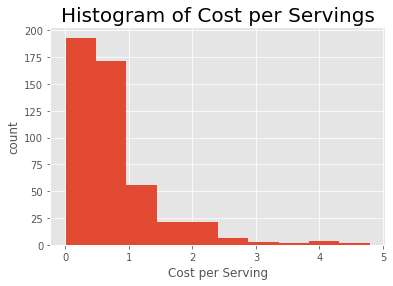

In [29]:
temp=recipedf['Cost_per_serv'][recipedf['Cost_per_serv']>0 ]
temp.head(2)
plt.hist(temp[temp<5])
plt.xlabel('Cost per Serving')
plt.ylabel('count')
plt.title('Histogram of Cost per Servings', fontsize=20)

Text(0.5, 1.0, 'Histogram of Cost per Servings')

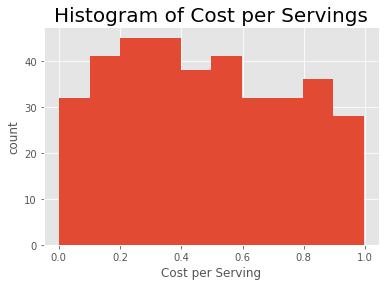

In [30]:
temp=recipedf['Cost_per_serv'][recipedf['Cost_per_serv']>0 ]
temp.head(2)
plt.hist(temp[temp<1])
plt.xlabel('Cost per Serving')
plt.ylabel('count')
plt.title('Histogram of Cost per Servings', fontsize=20)

Text(0.5, 1.0, 'Histogram of Calories per Servings')

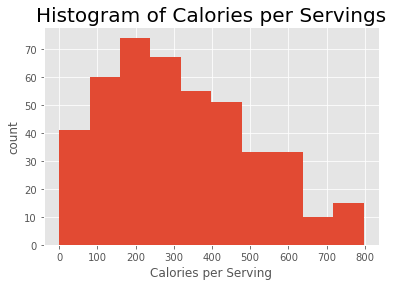

In [31]:
temp=recipedf['Cal_per_serv'][recipedf['Cal_per_serv']>0 ]
temp.head(2)
plt.hist(temp[temp<800])
plt.xlabel('Calories per Serving')
plt.ylabel('count')
plt.title('Histogram of Calories per Servings', fontsize=20)

Text(0.5, 1.0, 'Number of Reviews vs Recipe Rating')

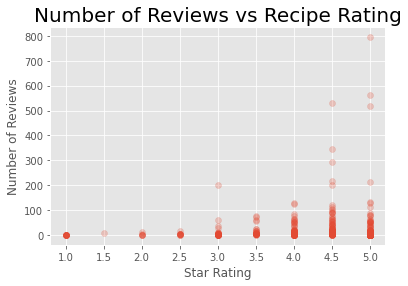

In [32]:
# temp=recipedf['Cal_per_serv'][recipedf['Cal_per_serv']>0 ]
# tempstars=recipedf['stars'][recipedf['Cal_per_serv']>0 ]
plt.scatter(recipedf['stars'], recipedf['Num_of_reviews'], alpha=0.25)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs Recipe Rating', fontsize=20)

Text(0.5, 1.0, 'Cost per Serving vs Recipe Rating')

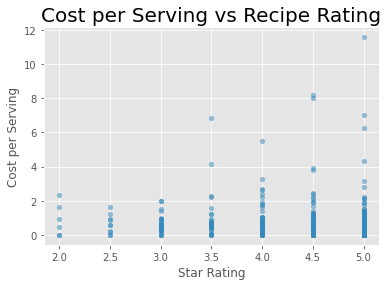

In [33]:
scatter_df = recipedf[['Cost_per_serv', 'stars']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
scatter_df.plot.scatter(x='stars', y='Cost_per_serv',alpha=.5)


plt.xlabel('Star Rating')
plt.ylabel('Cost per Serving')
plt.title('Cost per Serving vs Recipe Rating', fontsize=20)

In [34]:
# scatter_df = recipedf[['Cal_per_serv', 'stars']]
# scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
# scatter_df.plot.scatter(x='stars', y='Cal_per_serv',alpha=.5)


# plt.xlabel('Star Rating')
# plt.ylabel('Caloreis per Serving')
# plt.title('Calories per Serving vs Recipe Rating', fontsize=20)

Text(0.5, 1.0, 'Calories per Serving vs Recipe Rating')

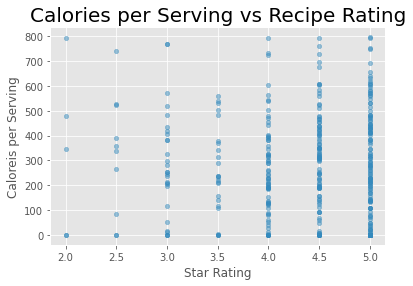

In [35]:
temp=recipedf['Cal_per_serv'][recipedf['Cal_per_serv']<800 ]
tempstars=recipedf['stars'][recipedf['Cal_per_serv']<800 ]
scatter_df=pd.concat([temp, tempstars], axis=1)
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
scatter_df.plot.scatter(x='stars', y='Cal_per_serv',alpha=.5)


plt.xlabel('Star Rating')
plt.ylabel('Caloreis per Serving')
plt.title('Calories per Serving vs Recipe Rating', fontsize=20)


Text(0.5, 1.0, 'Histogram of Calories per Servings')

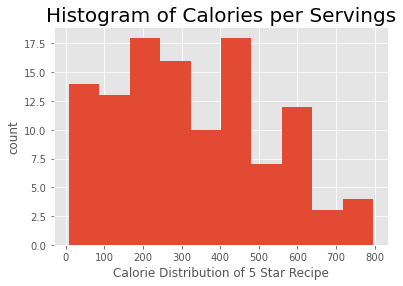

In [36]:
temp=recipedf['Cal_per_serv'][recipedf['stars']==5 ]
temp=temp[temp>0]
plt.hist(temp[temp<800])
plt.xlabel('Calorie Distribution of 5 Star Recipe')
plt.ylabel('count')
plt.title('Histogram of Calories per Servings', fontsize=20)

Text(0.5, 1.0, 'Histogram of Calories per Servings')

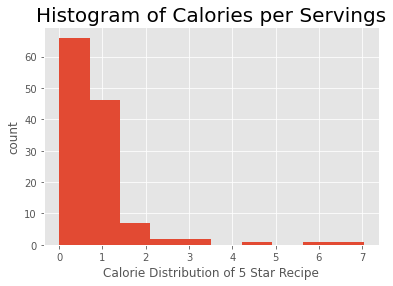

In [37]:
temp=recipedf['Cost_per_serv'][recipedf['stars']==5 ]
temp=temp[temp>0]
plt.hist(temp[temp<10])
plt.xlabel('Calorie Distribution of 5 Star Recipe')
plt.ylabel('count')
plt.title('Histogram of Calories per Servings', fontsize=20)

Text(0, 0.5, 'Calories per Serving')

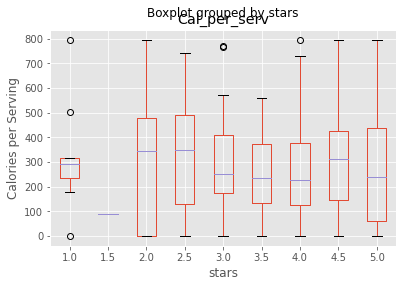

In [45]:
temp=recipedf['Cal_per_serv'][recipedf['Cal_per_serv']<800 ]
tempstars=recipedf['stars'][recipedf['Cal_per_serv']<800 ]

df_score =pd.concat([temp, tempstars], axis=1)
df_score.boxplot(by='stars', column='Cal_per_serv')
plt.ylabel('Calories per Serving')

In [43]:
recipedf['Cal_per_serv'][recipedf['Cal_per_serv']<800 ].mean()
#recipedf['Cost_per_serv'][recipedf['Cost_per_serv']<10 ].median()

276.6004006327406

Text(0.5, 1.0, 'Cost vs Calories per Serving of 5 Star Recipe')

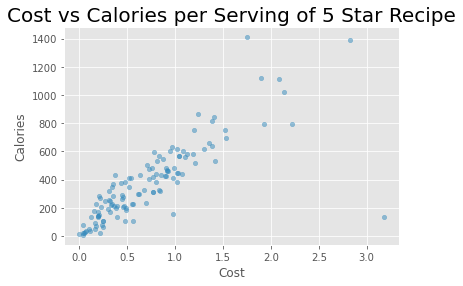

In [40]:
temp=recipedf['Cost_per_serv'][recipedf['stars']==5 ]
temp1=recipedf['Cal_per_serv'][recipedf['stars']==5 ]
scatter_df=pd.concat([temp, temp1], axis=1)
temp=scatter_df['Cost_per_serv'][scatter_df['Cal_per_serv']>0 ]
temp1=scatter_df['Cal_per_serv'][scatter_df['Cal_per_serv']>0 ]
scatter_df=pd.concat([temp, temp1], axis=1)
temp=scatter_df['Cost_per_serv'][scatter_df['Cost_per_serv']>0 ]
temp1=scatter_df['Cal_per_serv'][scatter_df['Cost_per_serv']>0 ]
scatter_df=pd.concat([temp, temp1], axis=1)
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
scatter_df.plot.scatter(x='Cost_per_serv', y='Cal_per_serv',alpha=.5)
plt.xlabel('Cost')
plt.ylabel('Calories')
plt.title('Cost vs Calories per Serving of 5 Star Recipe', fontsize=20)


Text(0.5, 1.0, 'Cost vs Calories per Serving of 5 Star Recipe')

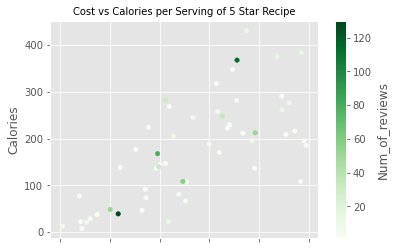

In [41]:
temp=recipedf['Cost_per_serv'][recipedf['stars']==5 ]
temp1=recipedf['Cal_per_serv'][recipedf['stars']==5 ]
temp2=recipedf['Num_of_reviews'][recipedf['stars']==5 ]
scatter_df=pd.concat([temp, temp1,temp2], axis=1)
temp=scatter_df['Cost_per_serv'][scatter_df['Cal_per_serv']>0 ]
temp1=scatter_df['Cal_per_serv'][scatter_df['Cal_per_serv']>0 ]
temp2=scatter_df['Num_of_reviews'][recipedf['Cal_per_serv']>0  ]
scatter_df=pd.concat([temp, temp1,temp2], axis=1)
temp=scatter_df['Cost_per_serv'][scatter_df['Cost_per_serv']>0 ]
temp1=scatter_df['Cal_per_serv'][scatter_df['Cost_per_serv']>0 ]
temp2=scatter_df['Num_of_reviews'][recipedf['Cost_per_serv']>0  ]
scatter_df=pd.concat([temp, temp1,temp2], axis=1)
temp=scatter_df['Cost_per_serv'][scatter_df['Cost_per_serv']<.5 ]
temp1=scatter_df['Cal_per_serv'][scatter_df['Cost_per_serv']<.5 ]
temp2=scatter_df['Num_of_reviews'][recipedf['Cost_per_serv']<.5  ]
scatter_df=pd.concat([temp, temp1,temp2], axis=1)
#scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
scatter_df.plot.scatter(x='Cost_per_serv', y='Cal_per_serv',c='Num_of_reviews',cmap='Greens')

plt.ylabel('Calories')
plt.xlabel('Cost')
plt.title('Cost vs Calories per Serving of 5 Star Recipe', fontsize=10)



In [42]:
recipedf[(recipedf['stars']==5) & (recipedf['Num_of_reviews']>40) & (recipedf['Cost_per_serv']>0)&(recipedf['Cost_per_serv']<.5) & (recipedf['Cal_per_serv']<400)]

,index,Recipe_title,servings,ingredients,stars,Num_of_reviews,Calories,Cost,Cost_per_serv,Cal_per_serv
53,135,Lemon Angel Food Cake,8,"0 (2.0, cups, sugar) 1 (1...",5.0,80.0,1340.0000,1.567518,0.195940,167.500000
185,717,Mini Vanilla Bean Yellow Cupcakes with Creamy ...,90,"0 (1, ...",5.0,52.0,4324.2500,9.064809,0.100720,48.047222
463,3109,Angel Food Cake with Espresso Mascarpone Cream,8,"0 (2.0, tablespoo...",5.0,58.0,864.8125,1.976146,0.247018,108.101562
484,3226,Lemon-Mint Cake with Lemon Syrup,8,"0 (1, 1, Butter, for gre...",5.0,113.0,2943.5625,2.845871,0.355734,367.945312
500,3285,Salmon Cakes with Lemon-Caper Yogurt Sauce,6,0 (1...,5.0,130.0,231.9375,0.700469,0.116745,38.656250
525,3775,Lemony Sunshine Cupcakes,16,"0 (1.3333333333333333, cups, shortbread...",5.0,52.0,3398.5000,6.276744,0.392296,212.406250
